A group of pre‐ dictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

Ensemble methods work best when the predictors are as independ‐ ent from one another as possible

One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging1 (short for bootstrap aggregating). When sampling is performed without replacement, it is called pasting.

As we have discussed, a Random Forest9 is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with max_samples set to the size of the training set.

### Importing the libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [3]:
df = pd.read_csv('Position_Salaries.csv')

### Review data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Split data into the independent vs dependent variables

In [11]:
X = df.iloc[:,1:2].values
y = df.iloc[:,-1].values

### Fitting the Random Forest Regression Model to the dataset

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [34]:
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting a new result

In [21]:
y_pred = regressor.predict(6.5)

In [22]:
y_pred

array([167000.])

### Visualizing the Random Forest Regression results (for higher resolution and smoother curve)

In [23]:
X_grid = np.arange(min(X),max(X),0.01) 

In [24]:
X_grid =  X_grid.reshape(len(X_grid),1)

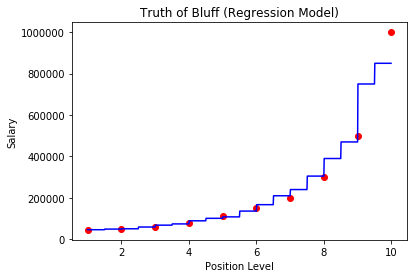

In [35]:
plt.scatter(X,y,color = 'red')
plt.plot(X_grid,regressor.predict(X_grid),color = 'blue')
plt.title('Truth of Bluff (Regression Model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Comment: If we add more trees on the forest, it does not mean we get more steps on the stairs because the more we add some trees, the more the average  predictions made by the trees is converging to the same average.